In [41]:
import pandas as pd
import numpy as np
from collections import Counter
import random

In [21]:
df = pd.read_csv("Data Potensi Cleaned.csv",delimiter=";")

In [108]:
df

,Height (cm),Weight (kg),Vertical Jump (cm),Potential
0,172,63,45,Medium
1,180,75,48,High
2,165,55,40,Low
3,185,80,50,High
4,170,62,42,Medium
...,...,...,...,...
506,167,61,30,Low
507,162,57,31,Low
508,160,55,27,Low
509,164,58,29,Low


In [109]:
X = df.drop("Potential",axis=1)
y = df["Potential"]

In [136]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        random.seed(random_state)
    
    indices = list(range(len(X)))
    random.shuffle(indices)

    split_point = int(len(X) * (1 - test_size))

    train_indices = indices[:split_point]
    test_indices = indices[split_point:]

    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    return X_train, X_test, y_train, y_test


In [137]:
def create_label_mapping(y):
    unique_values = list(set(y))
    label_map = {value: index for index, value in enumerate(unique_values)}
    reverse_map = {index: value for value, index in label_map.items()}
    y_numeric = y.map(label_map)
    
    return y_numeric, label_map, reverse_map

In [138]:
def minmax_scale(X):
    min_vals = X.min()
    max_vals = X.max()
    X_scaled = (X - min_vals) / (max_vals - min_vals)
    return X_scaled, min_vals, max_vals

In [139]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def euclidean_distance(self, x1, X_train):
        return np.sqrt(((X_train - x1) ** 2).sum(axis=1))
    
    def predict_single(self, x):
        distances = self.euclidean_distance(x, self.X_train)
        k_nearest_indices = distances.argsort()[:self.k]
        k_nearest_labels = self.y_train.iloc[k_nearest_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X):
        return X.apply(self.predict_single, axis=1)


In [140]:
X_transformed, min_vals, max_vals = minmax_scale(X)
y_transformed, label_map, reverse_map = create_label_mapping(y)

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y_transformed,0.2,42)

In [171]:
knn = KNN(k=11)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

correct_predictions = (predictions == y_test).sum()
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 92.23%


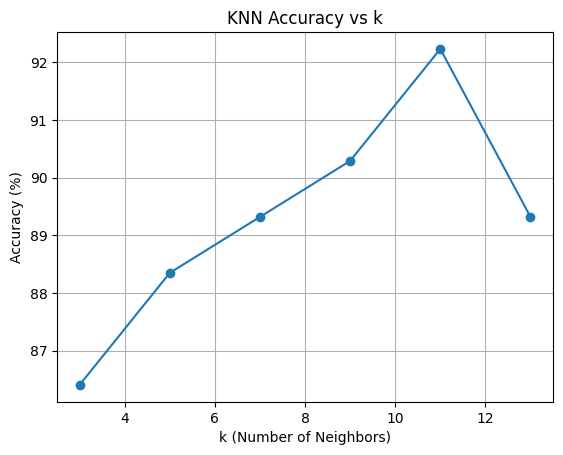

In [175]:
import matplotlib.pyplot as plt

k_values = [3, 5, 7, 9, 11, 13]  # Specific k values
accuracies = []

# Calculate accuracy for each k
for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    
    correct_predictions = (predictions == y_test).sum()
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions * 100
    accuracies.append(accuracy)

# Plot accuracy vs k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('KNN Accuracy vs k')
plt.grid(True)
